In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/Processed.csv')

df.head()

,Age,Gender,Year In School,Major,Monthly Income,Financial Aid,Tuition,Housing,Food,Transportation,Books & Supplies,Entertainment,Personal Care,Technology,Health & Wellness,Miscellaneous,Preferred Payment Method
0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card


# Câu hỏi: Số lượng sinh viên chọn tường phương thức thanh toán ưu tiên theo ngành học và theo năm học

### 1. Mục tiêu
Biêt được trong từng ngành học, theo từng năm số lượng sinh viên chọn từng phương thức ưu tiên thanh toán là bao nhiêu

### 2. Phân tích

In [19]:
df_ = df[["Major", "Preferred Payment Method", "Year In School", "Age"]].groupby(["Major", "Year In School", "Preferred Payment Method"]).count()
df_.head()

Age
Major   Year In School Preferred Payment Method     
Biology Freshman       Cash                       16
                       Credit/Debit Card          20
                       Mobile Payment App         21
        Junior         Cash                       13
                       Credit/Debit Card          22

### 3. Trực quan

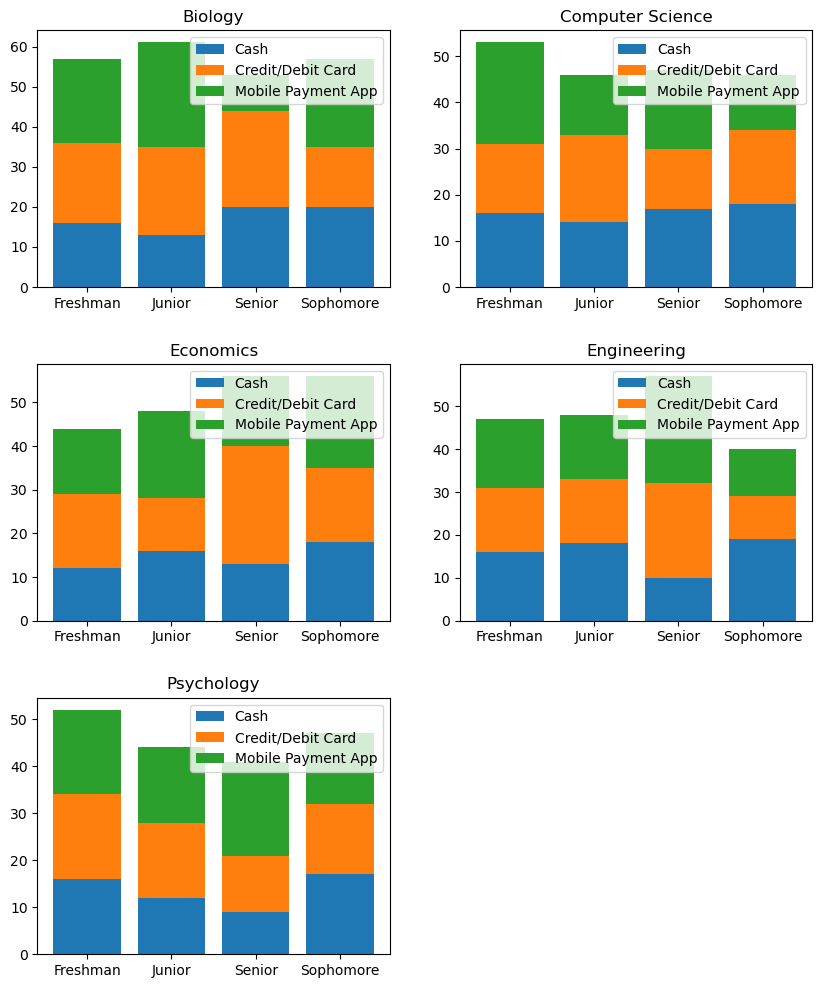

In [18]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(10,12))
axs = [ax1, ax2, ax3, ax4, ax5, ax6]
ax6.set_visible(False)
for i in range(0, 5):
    ax = axs[i]
    X = []
    Y1 = []
    Y2 = []
    Y3 = []
    sectors = ["Cash", "Credit/Debit Card", "Mobile Payment App"]
    for j in range(0, 4):
        X.append(df_.index[12*i + j*3][1])
        Y1.append(df_.iloc[12*i + j*3, 0])
        Y2.append(df_.iloc[12*i + j*3 + 1, 0])
        Y3.append(df_.iloc[12*i + j*3 + 2, 0])
    
    ax.set(title=df_.index[i*12][0])
    ax.bar(X, Y1, label=sectors[0])
    ax.bar(X, Y2, bottom=Y1, label=sectors[1])
    ax.bar(X, Y3, bottom=[d + b for d, b in zip(Y1, Y2)], label=sectors[2])
    ax.legend()

plt.subplots_adjust(hspace=0.3)

#0 12 24 36 48
#i = 0 => j: 0 3 6 9
#i = 1 => j: 12 15 18 21

### 4. Đánh giá
* Đối với các năm học khác nhau của cùng 1 chuyên ngành, sinh viên có xu hướng thay đổi phương thức ưu tiên thanh toán

# Câu hỏi: Có thể dự đoán được phương thức thanh toán ưu tiên dựa vào Monthly Income và tổng chi tiêu (trừ học phí) của sinh viên không?

### 1. Mục tiêu
Biết được liệu thu nhập hàng tháng và tổng chi tiêu có ảnh hướng đến cách chọn phương thức ưu tiên thanh toán của sinh viên hay không

### 2. Phân tích

In [25]:
df__ = df.copy(deep=True)
df__["Total Expenditures"] = df__.iloc[:, 6:16].sum(axis=1)
df__.head()

,Age,Gender,Year In School,Major,Monthly Income,Financial Aid,Tuition,Housing,Food,Transportation,Books & Supplies,Entertainment,Personal Care,Technology,Health & Wellness,Miscellaneous,Preferred Payment Method,Total Expenditures
0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card,7707
1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card,6756
2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash,4810
3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App,6665
4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card,5828


### 3. Trực quan

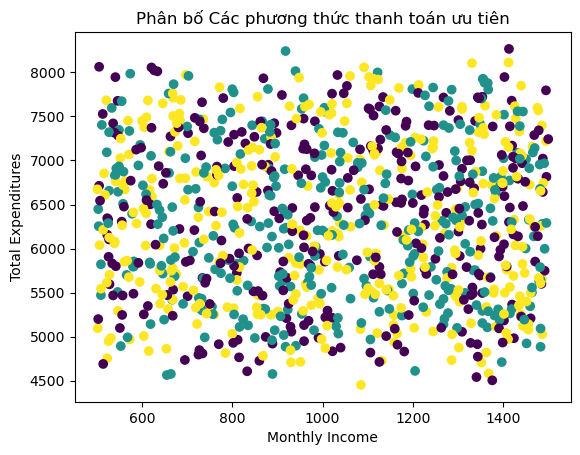

In [34]:
x = df__["Monthly Income"]
y = df__["Total Expenditures"]
colors = []
for method in df__["Preferred Payment Method"]:
    if method == "Cash":
        colors.append(1)
    elif method == "Credit/Debit Card":
        colors.append(2)
    elif method == "Mobile Payment App":
        colors.append(3)

plt.scatter(x, y, c=colors);
plt.xlabel("Monthly Income");
plt.ylabel("Total Expenditures");
plt.title("Phân bố Các phương thức thanh toán ưu tiên");

### 4. Đánh giá
Chưa thể dự đoán các phương thức thanh toán ưu tiên của sinh viên (Preferred Payment Method) dựa vào thu nhập hàng tháng (Monthly Income) và tổng chi tiêu (Total Expenditures)